# IRIS - Multiclass Classification

<img src="https://frenzy86.s3.eu-west-2.amazonaws.com/fav/iris.png" width="1200">

In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve
from sklearn.metrics import f1_score,auc, classification_report

import warnings
warnings.filterwarnings('ignore')

In [49]:
!wget https://frenzy86.s3.eu-west-2.amazonaws.com/python/iris.csv

--2022-04-11 19:29:54--  https://frenzy86.s3.eu-west-2.amazonaws.com/python/iris.csv
Resolving frenzy86.s3.eu-west-2.amazonaws.com (frenzy86.s3.eu-west-2.amazonaws.com)... 52.95.149.66
Connecting to frenzy86.s3.eu-west-2.amazonaws.com (frenzy86.s3.eu-west-2.amazonaws.com)|52.95.149.66|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4753 (4.6K) [text/csv]
Saving to: ‘iris.csv.1’

iris.csv.1          100%[===================>]   4.64K  --.-KB/s    in 0s      

2022-04-11 19:29:54 (406 MB/s) - ‘iris.csv.1’ saved [4753/4753]



In [50]:
# loading the csv data to a Pandas DataFrame
df = pd.read_csv('iris.csv')
df

,sepal_l,sepal_w,petal_l,petal_w,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


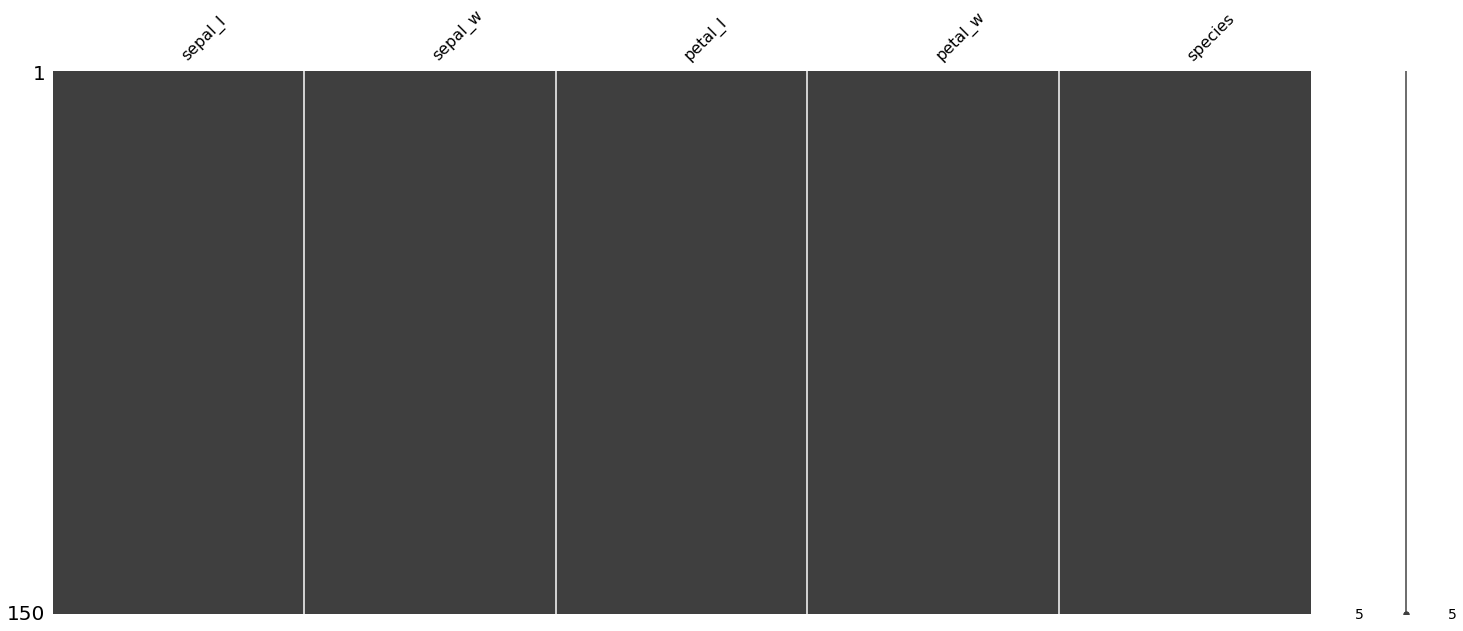

In [51]:
import missingno as msno
msno.matrix(df)

In [52]:
# getting some info about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   sepal_l  150 non-null    float64
 1   sepal_w  150 non-null    float64
 2   petal_l  150 non-null    float64
 3   petal_w  150 non-null    float64
 4   species  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [53]:
# checking for missing values
##df.isnull().sum().sum()
df.isnull().sum()

sepal_l    0
sepal_w    0
petal_l    0
petal_w    0
species    0
dtype: int64

In [54]:
# statistical measures about the data
df.describe()

,sepal_l,sepal_w,petal_l,petal_w
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [55]:
# checking the distribution of Target Variable
df['species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: species, dtype: int64

In [56]:
df['species'].replace({'Iris-setosa':0,'Iris-versicolor':1,'Iris-virginica':2},inplace=True)

# EDA

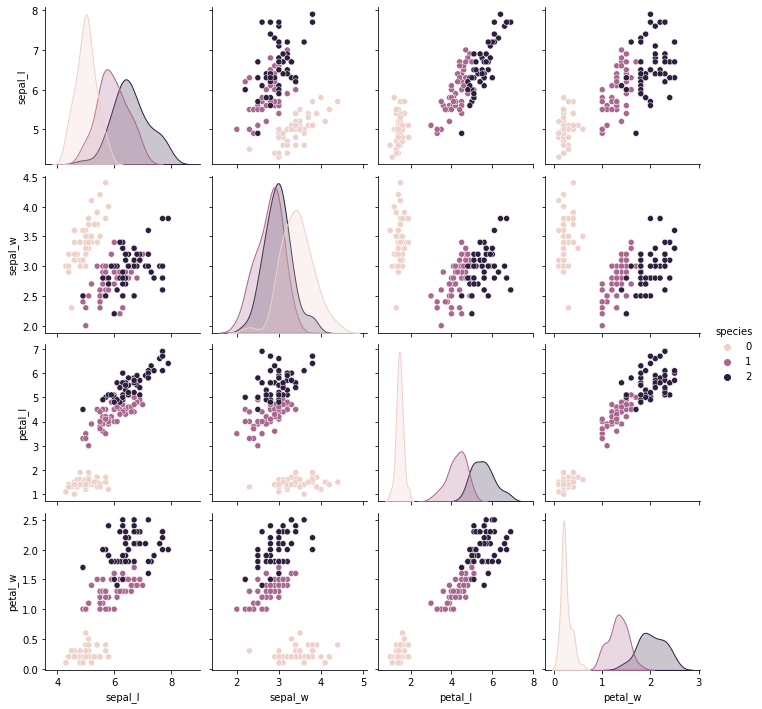

In [57]:
sns.pairplot(df,hue='species');

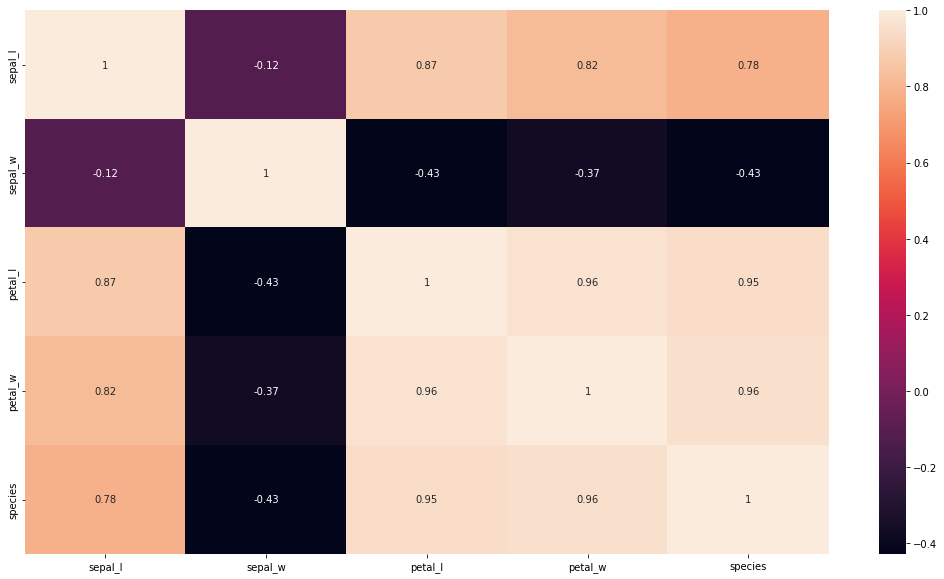

In [58]:
import seaborn as sns

plt.figure(figsize=(18,10))
sns.heatmap(df.corr(),annot=True);

Splitting the Features and Target

In [59]:
X = df.drop(columns='species', axis=1)

sc = StandardScaler()
standardized_data = sc.fit_transform(X)

X_ = standardized_data
X_

array([[-9.00681170e-01,  1.01900435e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00, -1.31979479e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.38535265e+00,  3.28414053e-01, -1.39706395e+00,
        -1.31544430e+00],
       [-1.50652052e+00,  9.82172869e-02, -1.28338910e+00,
        -1.31544430e+00],
       [-1.02184904e+00,  1.24920112e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-5.37177559e-01,  1.93979142e+00, -1.16971425e+00,
        -1.05217993e+00],
       [-1.50652052e+00,  7.88807586e-01, -1.34022653e+00,
        -1.18381211e+00],
       [-1.02184904e+00,  7.88807586e-01, -1.28338910e+00,
        -1.31544430e+00],
       [-1.74885626e+00, -3.62176246e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00,  9.82172869e-02, -1.28338910e+00,
        -1.44707648e+00],
       [-5.37177559e-01,  1.47939788e+00, -1.28338910e+00,
        -1.31544430e+00],
       [-1.26418478e+00,  7.88807586e-01, -1.22655167e+00,
      

In [60]:
y = df['species']
print(y)

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: species, Length: 150, dtype: int64


Splitting the Data into Training data & Test Data

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X_, y, 
                                                    test_size=0.2, 
                                                    random_state=667
                                                    )

In [62]:
print(X.shape, X_train.shape, X_test.shape)

(150, 4) (120, 4) (30, 4)


## Classification

In [63]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

In [64]:
model_collection = []

model_collection.append(LogisticRegression(solver='liblinear'))
model_collection.append(RandomForestClassifier())
model_collection.append(SVC())
model_collection.append(KNeighborsClassifier())
model_collection.append(DecisionTreeClassifier())
model_collection.append(GaussianNB())

In [65]:
model_list = ['Logistic_Regression','Random_Forest','SVM','KNN','DecionTree','Naive_Bayes']
acc_list = []
f1_list = []
cm_list = []

for model in model_collection:
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    acc_list.append(accuracy_score(y_test,y_pred))
    f1_list.append(f1_score(y_test,y_pred,average='macro'))
    cm_list.append(confusion_matrix(y_test,y_pred))

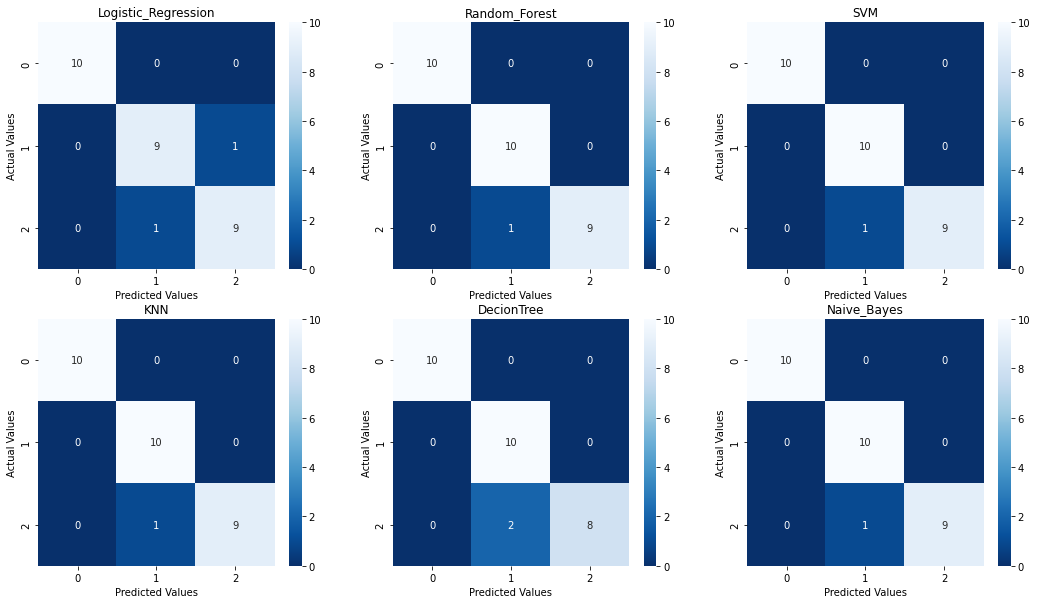

In [66]:
fig = plt.figure(figsize=(18,10))
for i in range(len(cm_list)):
    cm = cm_list[i]
    model = model_list[i]
    sub = fig.add_subplot(2,3,i+1).set_title(model)
    cm_plot = sns.heatmap(cm, annot=True,cmap='Blues_r')
    cm_plot.set_xlabel('Predicted Values')
    cm_plot.set_ylabel('Actual Values')

In [67]:
for model in model_collection:
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    print(model)
    print(classification_report(y_test,model.predict(X_test)))

LogisticRegression(solver='liblinear')
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.90      0.90      0.90        10
           2       0.90      0.90      0.90        10

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30

RandomForestClassifier()
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.91      1.00      0.95        10
           2       1.00      0.90      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30

SVC()
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.91      1.00      0.95        10
     

In [68]:
result_df = pd.DataFrame({
                            'Model':model_list,
                            'Accuracy':acc_list,
                            'F1':f1_list
                          })
result_df.sort_values(by=['F1'],ascending=False)

,Model,Accuracy,F1
1,Random_Forest,0.966667,0.966583
2,SVM,0.966667,0.966583
3,KNN,0.966667,0.966583
5,Naive_Bayes,0.966667,0.966583
0,Logistic_Regression,0.933333,0.933333
4,DecionTree,0.933333,0.932660


In [69]:
bestmodel = RandomForestClassifier().fit(X_train,y_train)

In [70]:
input_data = (3.4,4,5.1,4.2)

# change the input data to a numpy array
input_data_as_numpy_array= np.asarray(input_data)

# reshape the numpy array as we are predicting for only on instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = bestmodel.predict(input_data_reshaped)
print(prediction[0])

if prediction[0]== 0:
    print('setosa')
elif prediction[0]== 1:
    print('versicolor')
else:
    print('virginica')

2
virginica


## Pipeline

In [71]:
from sklearn.feature_selection import RFE
from sklearn.pipeline import Pipeline

In [72]:
# X = raw features
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=667
                                                    )

In [73]:
standardize = StandardScaler()
rfe = RFE(estimator=DecisionTreeClassifier(), n_features_to_select=6)
classifier = RandomForestClassifier()

pipe = Pipeline([
                ('scaler', standardize),
                ('featureselection',rfe),
                ('classifier',classifier)
                ])
pipe.fit(X_train,y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('featureselection',
                 RFE(estimator=DecisionTreeClassifier(),
                     n_features_to_select=6)),
                ('classifier', RandomForestClassifier())])

In [74]:
input_data = (3.4,4,5.1,4.2)

prediction = pipe.predict([input_data])
print(prediction[0])

if prediction[0]== 0:
    print('setosa')
elif prediction[0]== 1:
    print('versicolor')
else:
    print('virginica')

2
virginica


In [75]:
import joblib
joblib.dump(pipe,'pipe_iris.pkl')

['pipe_iris.pkl']

In [76]:
uploaded_model = joblib.load('pipe_iris.pkl')

uploaded_model.predict([input_data])[0] #0 means Diabetic

2